### Rashmi S

### Pokemon classification

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

import os
from pathlib import Path
import re

import tensorflow as tf

C:\Users\rashm\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rashm\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\rashm\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\rashm\anaconda3\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
train_dir = "D:/Down/images"
train_path = Path(train_dir)

In [3]:
files = list(train_path.glob('*.png'))
names = [os.path.split(x)[1] for x in list(train_path.glob('*.png'))]

image_df = pd.concat([pd.Series(names, name='Name'), pd.Series(files, name='Filepath').astype(str)], axis=1)
image_df['Name'] = image_df['Name'].apply(lambda x: re.sub(r'\.\w+$', '', x))
image_df

,Name,Filepath
0,accelgor,D:\Down\images\accelgor.png
1,alakazam,D:\Down\images\alakazam.png
2,alomomola,D:\Down\images\alomomola.png
3,archeops,D:\Down\images\archeops.png
4,articuno,D:\Down\images\articuno.png
...,...,...
85,tornadus-incarnate,D:\Down\images\tornadus-incarnate.png
86,torterra,D:\Down\images\torterra.png
87,yanmega,D:\Down\images\yanmega.png
88,yveltal,D:\Down\images\yveltal.png


In [4]:
label_df = pd.read_csv("D:/Down/pokemon.csv")
label_df

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,NaN
807,meltan,Steel,NaN


In [5]:
label_df.Type1.value_counts()

Water       114
Normal      105
Grass        78
Bug          72
Fire         53
Psychic      53
Rock         46
Electric     40
Poison       34
Ground       32
Fighting     29
Dark         29
Ghost        27
Dragon       27
Steel        26
Ice          23
Fairy        18
Flying        3
Name: Type1, dtype: int64

In [6]:
# Merging dfs
train_df = image_df.merge(label_df, on='Name')
train_df = train_df.drop(['Name', 'Type2'], axis=1)
train_df

,Filepath,Type1
0,D:\Down\images\accelgor.png,Bug
1,D:\Down\images\alakazam.png,Psychic
2,D:\Down\images\alomomola.png,Water
3,D:\Down\images\archeops.png,Rock
4,D:\Down\images\articuno.png,Ice
...,...,...
85,D:\Down\images\tornadus-incarnate.png,Flying
86,D:\Down\images\torterra.png,Grass
87,D:\Down\images\yanmega.png,Bug
88,D:\Down\images\yveltal.png,Dark


In [7]:
train_df.Type1.value_counts()

Water       15
Normal      12
Fire         9
Electric     8
Bug          6
Grass        6
Poison       5
Psychic      5
Ground       4
Fighting     4
Rock         4
Dragon       3
Ice          2
Fairy        2
Ghost        2
Dark         2
Flying       1
Name: Type1, dtype: int64

In [8]:
# Limiting data to Fire and Water types
train_df = train_df.query("Type1 == 'Fire' | Type1 == 'Water'")
train_df
#print(len(train_df))

,Filepath,Type1
2,D:\Down\images\alomomola.png,Water
10,D:\Down\images\blaziken.png,Fire
14,D:\Down\images\carracosta.png,Water
15,D:\Down\images\charizard.png,Fire
17,D:\Down\images\crawdaunt.png,Water
19,D:\Down\images\darmanitan-standard.png,Fire
23,D:\Down\images\finneon.png,Water
24,D:\Down\images\flareon.png,Fire
25,D:\Down\images\fletchinder.png,Fire
27,D:\Down\images\froakie.png,Water


### Loading image data

In [14]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255
)

In [15]:
train_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Type1',
    target_size=(120, 120),
    color_mode='rgba', # a for transperance
    class_mode='sparse',
    batch_size=32,
    shuffle=True,
    seed=1,
    subset='training'
)

val_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Type1',
    target_size=(120, 120),
    color_mode='rgba',
    class_mode='sparse',
    batch_size=32,
    shuffle=True,
    seed=1,
    subset='validation'
)

Found 20 validated image filenames belonging to 2 classes.
Found 4 validated image filenames belonging to 2 classes.


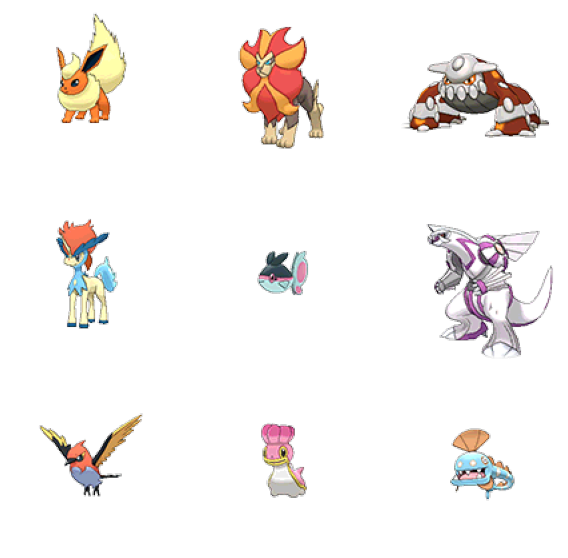

In [16]:
image_sample = train_data.next()[0]

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image_sample[i, :, :, :])
    plt.axis('off')
plt.show()

### Building a model

In [17]:
inputs = tf.keras.Input(shape=(120, 120, 4))

conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(8, 8), activation='relu')(inputs)
pool1 = tf.keras.layers.MaxPool2D()(conv1)

conv2 = tf.keras.layers.Conv2D(filters=128, kernel_size=(8, 8), activation='relu')(pool1)
pool2 = tf.keras.layers.MaxPool2D()(conv2)

conv3 = tf.keras.layers.Conv2D(filters=256, kernel_size=(8, 8), activation='relu')(pool2)
pool3 = tf.keras.layers.MaxPool2D()(conv3)

outputs = tf.keras.layers.GlobalAveragePooling2D()(pool3)


feature_extractor = tf.keras.Model(inputs=inputs, outputs=outputs)

In [18]:
feature_extractor.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 120, 4)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 113, 113, 64)      16448     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 49, 49, 128)       524416    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 17, 17, 256)       2097

### classification

In [19]:
clf_inputs = feature_extractor.input
clf_outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(feature_extractor.output)

classifier = tf.keras.Model(inputs=clf_inputs, outputs=clf_outputs)

In [20]:
classifier.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 120, 4)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 113, 113, 64)      16448     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 49, 49, 128)       524416    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 17, 17, 256)       2097

### Training

In [43]:
classifier.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = classifier.fit(
    train_data,
    validation_data=val_data,
    batch_size=32,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6923 - accuracy: 0.6000 - val_loss: 0.7168 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.6524 - accuracy: 0.6500 - val_loss: 1.1124 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.7583 - accuracy: 0.6500 - val_loss: 0.7098 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.6250 - accuracy: 0.6500 - val_loss: 0.6842 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.6535 - accuracy: 0.6500 - val_loss: 0.6798 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.6495 - accuracy: 0.6500 - val_loss: 0.6774 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.6065 - accuracy: 0.6500 - val

In [38]:
feature_extractor.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 120, 4)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 113, 113, 64)      16448     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 49, 49, 128)       524416    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 17, 17, 256)       2097

In [39]:
feature_extractor.layers

In [40]:
feature_extractor.layers[1].weights[0].shape

TensorShape([8, 8, 4, 64])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

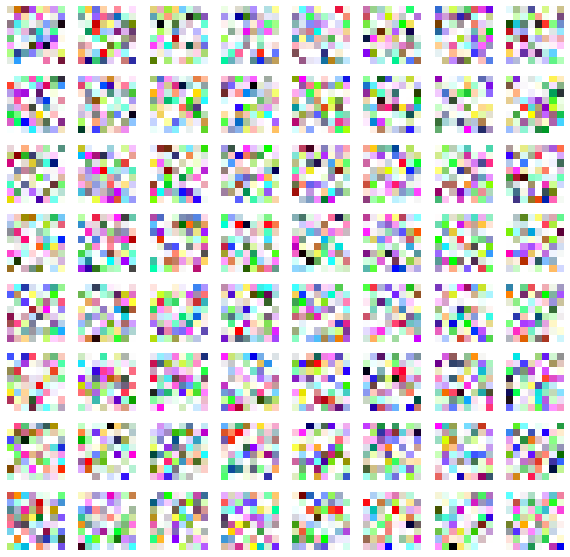

In [41]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 10))
for i in range(64):
    plt.subplot(8, 8, i + 1)
    img = feature_extractor.layers[1].weights[0][:, :, :, i].numpy().copy()
    for channel in range(4):
        img[:, :, channel] = minmax_scale(img[:, :, channel])
    plt.imshow(img)
    plt.axis('off')
plt.show()

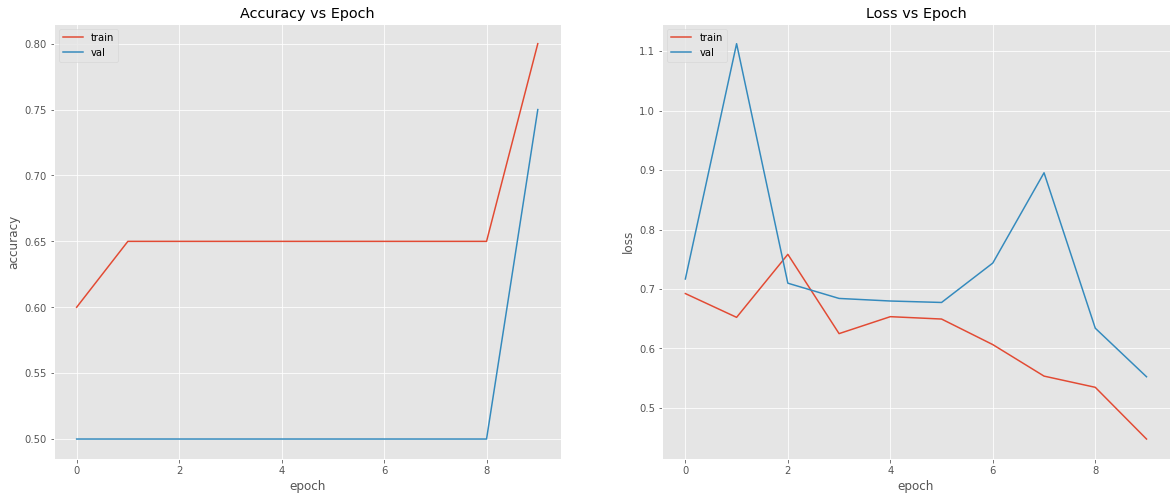

In [45]:
# Create a plot layout
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Summarize history for accuracy
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Accuracy vs Epoch')
ax[0].set(xlabel='epoch', ylabel='accuracy')
ax[0].legend(['train', 'val'], loc='upper left')

# Summarize history for loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Loss vs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
ax[1].legend(['train', 'val'], loc='upper left')

# Display plots
plt.show()

### These are weights of the image

### Hence, we built a model to classify the image types as fire and water